In [1]:
import kwant
import matplotlib.pyplot as plt
%matplotlib notebook
import scipy.sparse.linalg as sla
import numpy as np

In [2]:
def plot_wave_function(t, delta, mu, W, L):
    #SAME CODE AS IN ENERGY
    sys = kwant.Builder() #create the system, but it's empty
    a = 1 #distance between the sites (lattice constant)
    lat = kwant.lattice.square(a) #defines the lattice
    for i in range(L):#itteration horizontally over the system (0--L-1)
        for j in range(W): #itteration vertically over the system (0--W-1)
            if j==0:
                sys[lat(i, j)] = mu #on-site Hamiltonian ($a_{i,j}^\dag a_{i,j}*mu$) 
            elif j==1:
                sys[lat(i, j)] = -mu #on-site Hamiltonian ($a_{i,j}^\dag a_{i,j}*-mu$) 
            if i>0:
                sys[(lat(i-1, j), lat(i, j))] = t #horizontal hopping ($a_{i-1,j}^\dag a_{i,j}*t$)
                if j>0:
                    sys[(lat(i-1, j-1), lat(i, j))] = delta # superconducting gap ($a_{i-1,j-1}^\dag a_{i,j}*t$)
                    sys[(lat(i-1, j), lat(i, j-1))] = -delta # superconducting gap ($a_{i-1,j}^\dag a_{i,j-1}*t$)
                    sys[(lat(i-1, j), lat(i, j))] = -t #horizontal hopping ($a_{i-1,j}^\dag a_{i,j}*t$)
    #UNTIL HERE
                
    # Calculate the wave functions in the system.
    ham_mat = sys.finalized().hamiltonian_submatrix(sparse=True)
    evecs = sla.eigsh(ham_mat, k=8, which='SM',  maxiter=100000)[1]

    # Plot the probability density of the 1st eigenmode.
    kwant.plotter.map(sys.finalized(), np.abs(evecs[:, 0])**2,colorbar=False, oversampling=1) 

<IPython.core.display.Javascript object>


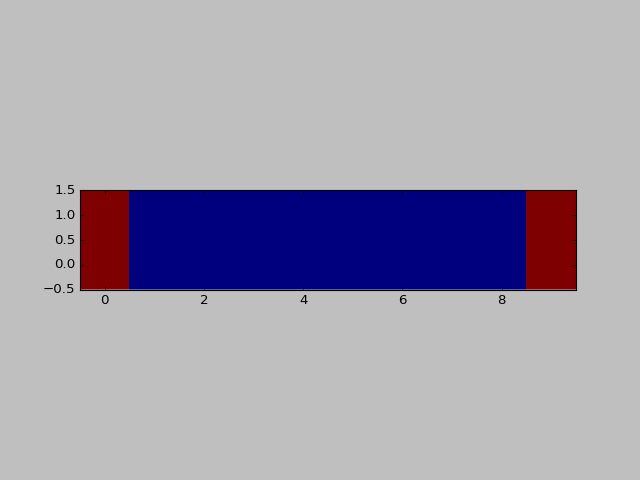

In [3]:
#plot_wave_function(t, delta, mu, W, L)
plot_wave_function(1.00, 0.99, 0.0, 2, 10)

In [4]:
def disorder_energy(t, delta, mu, W, L, disorder):
    sys = kwant.Builder() #create the system, but it's empty
    a = 1 #distance between the sites (lattice constant)
    lat = kwant.lattice.square(a) #defines the lattice
    for i in range(L):#itteration horizontally over the system (0--L-1)
        for j in range(W): #itteration vertically over the system (0--W-1)
            mu_i = np.random.randn()*disorder + mu
            if j==0:
                sys[lat(i, j)] = mu_i #on-site Hamiltonian ($a_{i,j}^\dag a_{i,j}*mu$) 
            if j==1:
                sys[lat(i, j)] = -mu_i #on-site Hamiltonian ($a_{i,j}^\dag a_{i,j}*-mu$) 
                
            if i>0:
                sys[(lat(i-1, j), lat(i, j))] = t #horizontal hopping ($a_{i-1,j}^\dag a_{i,j}*t$)
                if j>0:
                    sys[(lat(i-1, j-1), lat(i, j))] = delta # superconducting gap ($a_{i-1,j-1}^\dag a_{i,j}*t$)
                    sys[(lat(i-1, j), lat(i, j-1))] = -delta # superconducting gap ($a_{i-1,j}^\dag a_{i,j-1}*t$)
                    sys[(lat(i-1, j), lat(i, j))] = -t #horizontal hopping ($a_{i-1,j}^\dag a_{i,j}*t$)
                
    ham_mat = sys.finalized().hamiltonian_submatrix(sparse=True) # i think solves the hamiltonian
    ev = sla.eigsh(ham_mat, k=8, which='SM', return_eigenvectors=False, maxiter=100000) #which = what energy levels to return
                                                # SM = smallest absolute value, i.e. closest to 0, maxiter = ???, k = 8 ???
    return ev #returns eigenvalues of system closest to zero
"""
Disorder is is the standard deviation from our mean mu 
"""

'\nDisorder is is the standard deviation from our mean mu \n'

In [5]:
#disorder_energy(t, delta, mu, W, L, disorder)
np.sort(disorder_energy(1.00, 0.99, 0.0, 2, 10,0.2)) #returns eigenvalues of Hamiltonian closest to zero

array([-1.89073153, -1.86905308, -1.85495409, -1.76805301, -0.0551064 ,
       -0.04033646,  1.77476228,  1.85303807])

In [6]:
def plot_disorder_energies(trange, delta, mu, W, L, disorder):

    energies = []
    
    for t in trange:
        
        energies.append(np.sort(disorder_energy(t, delta, mu, W, L, disorder)))

    plt.figure()
    plt.xlabel('Hopping potential')
    plt.ylabel('Energy')
    plt.title('How energy states vary with hopping potential in a quantum wire in a non-ideal system', y=1.02)
    plt.plot(trange, energies)
    plt.show()
    
"""
This function plots how the eigenvalues of the system change as we change the hopping potential
"""

'\nThis function plots how the eigenvalues of the system change as we change the hopping potential\n'

<IPython.core.display.Javascript object>


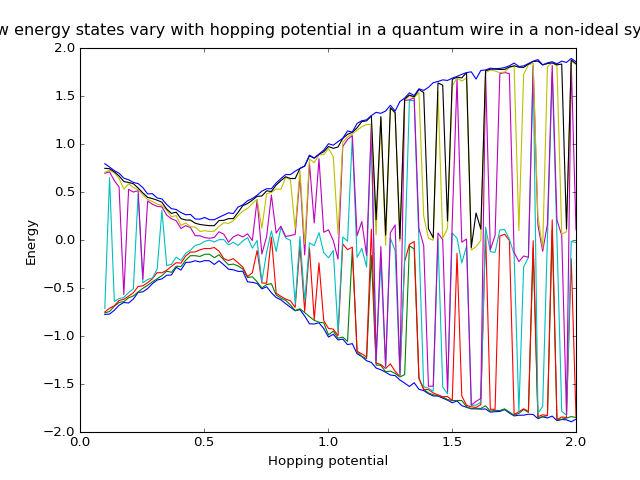

In [7]:
trange = np.linspace(0.1, 2.0, 100)
#plot_disorder_energies(trange, delta, mu, W, L, disorder)
plot_disorder_energies(trange, 1., 1.0, 2, 100,0.2)